In [1]:
#-----------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------[ Imports ]------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import easygui
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
#-----------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------[ Import DataBase ]-------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

In [4]:
pathDataTelecom=easygui.fileopenbox()
pathDataTelecom

'S:\\TunisieTelecom\\ECHANTILLON.xlsx'

In [5]:
dataTelecom=pd.read_excel(pathDataTelecom)
dataTelecom.head(10)

,STATUT,OFFRE,ANC_M,HANDSET,revenu_voix,revenu_inter,NB_JOUR_ACTIVITE_TAXE,NB_JOUR_APPEL_TAXE,DUREE_APPEL_TOT,DUREE_APPEL_TAXEE,...,FREQ_USSD_VOIX,FREQ_USSD_SMS,VOLUME_SESSION,VOLUME_SESSION_WEEKEND,REVENU_VAS,ARPU,P_revenu_data,P_revenu_voix_c,P_revenu_vas_c,id_client
0,A,PRE - TT 1000%,143,2G,8.94,0.0,14.33,14.33,666.64,12.12,...,1.18,184.0,0.02,0.01,0.00,33.01,0.00,0.27,0.00,1.0
1,A,PRE - 900 bonus,142,2G,6.32,0.0,7.33,7.00,50.09,6.49,...,184.00,184.0,0.00,0.00,0.99,7.31,0.00,0.86,0.14,2.0
2,A,PRE - TT 1500%,142,2G,3.13,0.0,7.67,5.00,42.72,3.71,...,184.00,184.0,0.00,0.00,0.00,3.23,0.00,0.97,0.00,3.0
3,A,PRE - offre 40,140,2G,4.55,0.0,17.67,17.67,80.43,80.43,...,184.00,184.0,0.21,0.00,0.00,4.55,0.00,1.00,0.00,4.0
4,A,PRE - TT 1500%,142,2G,0.00,0.0,1.33,0.00,3.10,0.00,...,184.00,184.0,0.00,0.00,0.53,2.03,0.74,0.00,0.26,5.0
5,A,PRE - TT 1500%,142,2G,10.59,0.0,8.67,8.67,203.96,12.35,...,184.00,184.0,0.00,0.00,0.00,10.59,0.00,1.00,0.00,6.0
6,A,PRE - Trankil TT,142,2G,4.51,0.0,20.67,19.33,95.57,89.02,...,184.00,184.0,0.00,0.00,0.00,4.99,0.00,0.90,0.00,7.0
7,A,PRE - Double,140,2G,5.07,0.0,10.67,10.67,36.22,17.39,...,184.00,184.0,111.62,49.83,0.00,5.85,0.13,0.87,0.00,8.0
8,A,PRE - TT 1500%,143,2G,12.94,0.1,13.33,6.67,905.15,16.29,...,184.00,184.0,1407.94,330.75,11.17,32.55,0.25,0.40,0.34,9.0
9,A,PRE - Double,141,2G,0.77,0.0,6.00,1.00,25.01,3.38,...,184.00,184.0,0.00,0.00,4.88,5.67,0.00,0.14,0.86,10.0


In [6]:
# selection of the most important variables for each clustering
selected_variables = [
    'FREQ_USSD', 'revenu_cdr_c','DUREE_APPEL_TOT','MNT_RECH','VOLUME_SESSION', 'MNT_FORFAIT_DATA','FREQ_ACT_OUT'
]

# Select the desired variables from the dataframe
dataTelecomSelected = dataTelecom[selected_variables].copy()
dataTelecomSelected.head(2000)

,FREQ_USSD,revenu_cdr_c,DUREE_APPEL_TOT,MNT_RECH,VOLUME_SESSION,MNT_FORFAIT_DATA,FREQ_ACT_OUT
0,1.18,8.94,666.64,33.67,0.02,0.00,0.03
1,184.00,7.31,50.09,7.33,0.00,0.00,0.30
2,184.00,3.23,42.72,3.67,0.00,0.00,0.60
3,184.00,4.55,80.43,4.33,0.21,0.00,0.60
4,17.96,0.53,3.10,2.67,0.00,1.50,2.65
...,...,...,...,...,...,...,...
1995,15.00,2.90,7.30,3.67,135.62,0.72,2.14
1996,184.00,4.54,24.52,4.33,0.00,0.00,1.29
1997,22.56,59.62,435.24,66.67,2381.06,6.00,0.05
1998,184.00,9.45,74.17,9.33,0.00,0.00,0.26


In [7]:
dataTelecomSelectedSample=dataTelecomSelected.sample(n=1000)
KmeansData = dataTelecomSelectedSample.copy()

In [8]:
dataTelecomSelectedSample.head(1000)

,FREQ_USSD,revenu_cdr_c,DUREE_APPEL_TOT,MNT_RECH,VOLUME_SESSION,MNT_FORFAIT_DATA,FREQ_ACT_OUT
58716,44.78,0.25,1.90,13.33,9684.46,7.75,2.90
23554,184.00,3.09,8.02,3.33,0.39,0.00,1.70
48267,15.00,0.15,9.84,1.67,166.41,1.80,0.87
83515,4.50,5.91,43.27,39.00,10451.21,32.25,0.38
22824,184.00,3.22,24.00,1.67,1.04,0.00,1.67
...,...,...,...,...,...,...,...
26760,184.00,3.72,22.70,5.00,0.00,0.00,0.86
7884,8.17,15.78,318.94,65.00,43960.22,50.93,0.07
22794,17.96,3.08,31.30,2.67,254.60,1.07,0.30
9536,184.00,2.04,38.98,1.67,0.00,0.00,0.77


In [9]:
#-----------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------[ Clustering ]------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------

In [10]:
#-------------------------------------> Elbow Method

S:\TunisieTelecom\TelecomPyton\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
S:\TunisieTelecom\TelecomPyton\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
S:\TunisieTelecom\TelecomPyton\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
S:\TunisieTelecom\TelecomPyton\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

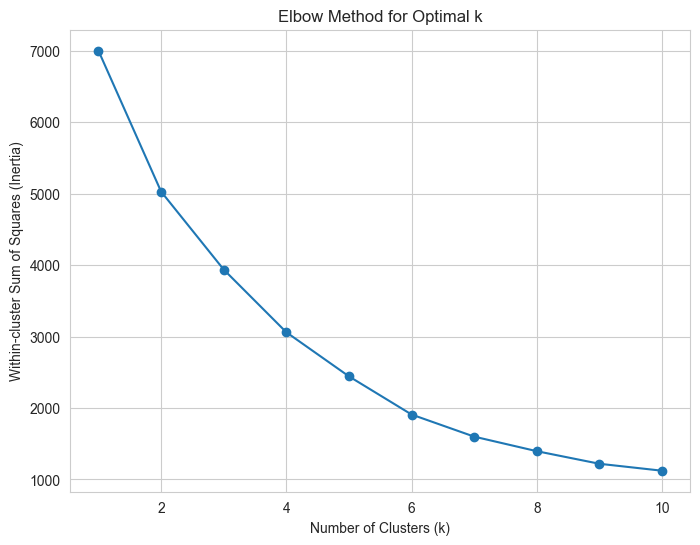

In [11]:
# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(KmeansData)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [12]:
# K =6

# Perform k-means clustering with the selected number of clusters
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
KmeansData['Cluster'] = cluster_labels

# Explore the cluster characteristics (e.g., mean values of each variable per cluster)
cluster_characteristics = KmeansData.groupby('Cluster')[selected_variables].mean()

# Print the cluster characteristics
print(cluster_characteristics)

# You can further analyze and interpret the clusters to gain insights into customer segments based on usage behavior.

          FREQ_USSD  revenu_cdr_c  DUREE_APPEL_TOT    MNT_RECH  \
Cluster                                                          
0        181.127107      0.006033         0.018017    0.258843   
1         19.412895      3.563980       116.607829   10.698586   
2         14.469024      8.750732       383.106341   56.625854   
3        128.030778     22.668111       376.615889   26.211222   
4          4.350000     40.013333      3114.776667  159.230000   
5        175.556463      3.488662        48.683311    4.176531   

         VOLUME_SESSION  MNT_FORFAIT_DATA  FREQ_ACT_OUT  
Cluster                                                  
0            121.924793          0.016116    170.151901  
1           2056.153618          5.331908      1.766184  
2          27238.988780         35.372927      0.350488  
3            849.538667          2.059667      0.113667  
4          25007.403333         94.200000      0.016667  
5            145.094671          0.026281      3.253152  


S:\TunisieTelecom\TelecomPyton\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
from sklearn.metrics import silhouette_score
#Higher Silhouette scores indicate better-defined clusters.
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Average Silhouette Score:", silhouette_avg)

Average Silhouette Score: 0.5097080789066769


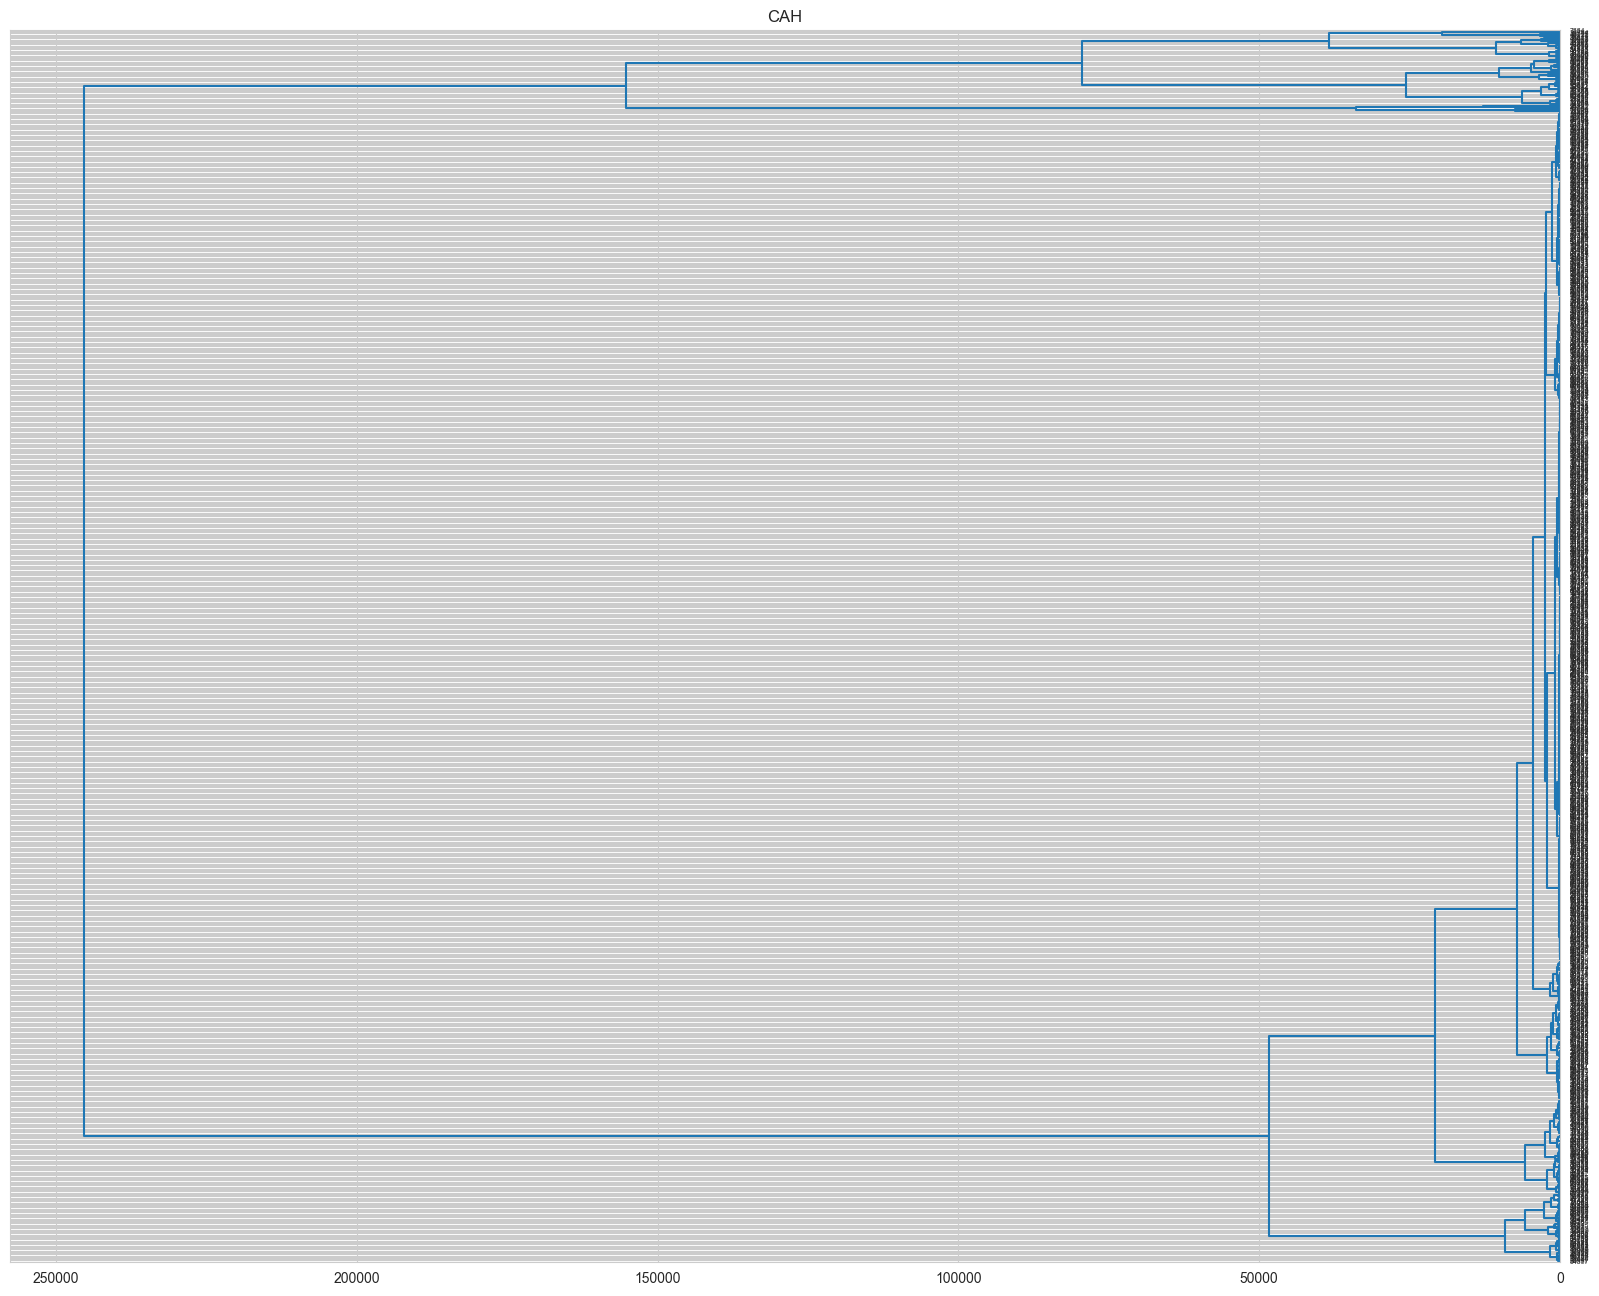

In [14]:
# ---> CAH
plt.figure(figsize=(20, 16))
#générer la matrice des liens

Z = linkage(dataTelecomSelectedSample,method='ward', metric='euclidean')

plt.title("CAH")

dendrogram(Z,labels=dataTelecomSelectedSample.index,orientation='left',color_threshold=0)

plt.show()

In [15]:
# ---> Centrage et Reduction

In [16]:

scaler = preprocessing.StandardScaler()
dataTelecomSelectedSample_scaled = scaler.fit_transform(dataTelecomSelectedSample)
dataTelecomSelectedSample_scaled = pd.DataFrame(dataTelecomSelectedSample_scaled, index=dataTelecomSelectedSample.index, columns=dataTelecomSelectedSample.columns)
print('X_scaled', dataTelecomSelectedSample_scaled.shape)

X_scaled (1000, 7)


In [17]:
# Calculate the interval length
max_value = dataTelecomSelectedSample['revenu_cdr_c'].max()
interval_length = max_value / 5

# Define the intervals
intervals=[-0.1,5,10,16,21,217] # ---> ] .. , ..]
#intervals = np.arange(-1, max_value + interval_length , interval_length)  # Adding a small value for inclusiveness

# Assign interval labels
labels = ['Interval 1', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5']

# Transform column values into intervals
dataTelecomSelectedSample['Intervals'] = pd.cut(dataTelecomSelectedSample['revenu_cdr_c'], bins=intervals, labels=labels, right=True)

dataTelecomSelectedSample.head(1000)


,FREQ_USSD,revenu_cdr_c,DUREE_APPEL_TOT,MNT_RECH,VOLUME_SESSION,MNT_FORFAIT_DATA,FREQ_ACT_OUT,Intervals
58716,44.78,0.25,1.90,13.33,9684.46,7.75,2.90,Interval 1
23554,184.00,3.09,8.02,3.33,0.39,0.00,1.70,Interval 1
48267,15.00,0.15,9.84,1.67,166.41,1.80,0.87,Interval 1
83515,4.50,5.91,43.27,39.00,10451.21,32.25,0.38,Interval 2
22824,184.00,3.22,24.00,1.67,1.04,0.00,1.67,Interval 1
...,...,...,...,...,...,...,...,...
26760,184.00,3.72,22.70,5.00,0.00,0.00,0.86,Interval 1
7884,8.17,15.78,318.94,65.00,43960.22,50.93,0.07,Interval 3
22794,17.96,3.08,31.30,2.67,254.60,1.07,0.30,Interval 1
9536,184.00,2.04,38.98,1.67,0.00,0.00,0.77,Interval 1


In [18]:
dataTelecomSelectedSample.revenu_cdr_c.max()

68.81

In [19]:
y = dataTelecomSelectedSample['Intervals']
print('y', y.shape, y.unique()) # correle -> 1 bark -> on choisit celles dans correlation est loin

y (1000,) ['Interval 1', 'Interval 2', 'Interval 4', 'Interval 3', 'Interval 5']
Categories (5, object): ['Interval 1' < 'Interval 2' < 'Interval 3' < 'Interval 4' < 'Interval 5']


In [20]:
class_color = {'Interval 1': 'red', 'Interval 2': 'yellow', 'Interval 3': 'green','Interval 4':'blue','Interval 5':'violet','Interval 6':'white'}
#class_color = {'Interval 1': '#F3FF83', 'Interval 2': '#A0D287', 'Interval 3': '#4BA48D','Interval 4':'#05728A','Interval 5':'#1D4060'}
y_color = [class_color[c] for c in y]
print('y', y.shape, y.unique())


y (1000,) ['Interval 1', 'Interval 2', 'Interval 4', 'Interval 3', 'Interval 5']
Categories (5, object): ['Interval 1' < 'Interval 2' < 'Interval 3' < 'Interval 4' < 'Interval 5']


In [21]:
y

58716    Interval 1
23554    Interval 1
48267    Interval 1
83515    Interval 2
22824    Interval 1
            ...    
26760    Interval 1
7884     Interval 3
22794    Interval 1
9536     Interval 1
58878    Interval 1
Name: Intervals, Length: 1000, dtype: category
Categories (5, object): ['Interval 1' < 'Interval 2' < 'Interval 3' < 'Interval 4' < 'Interval 5']

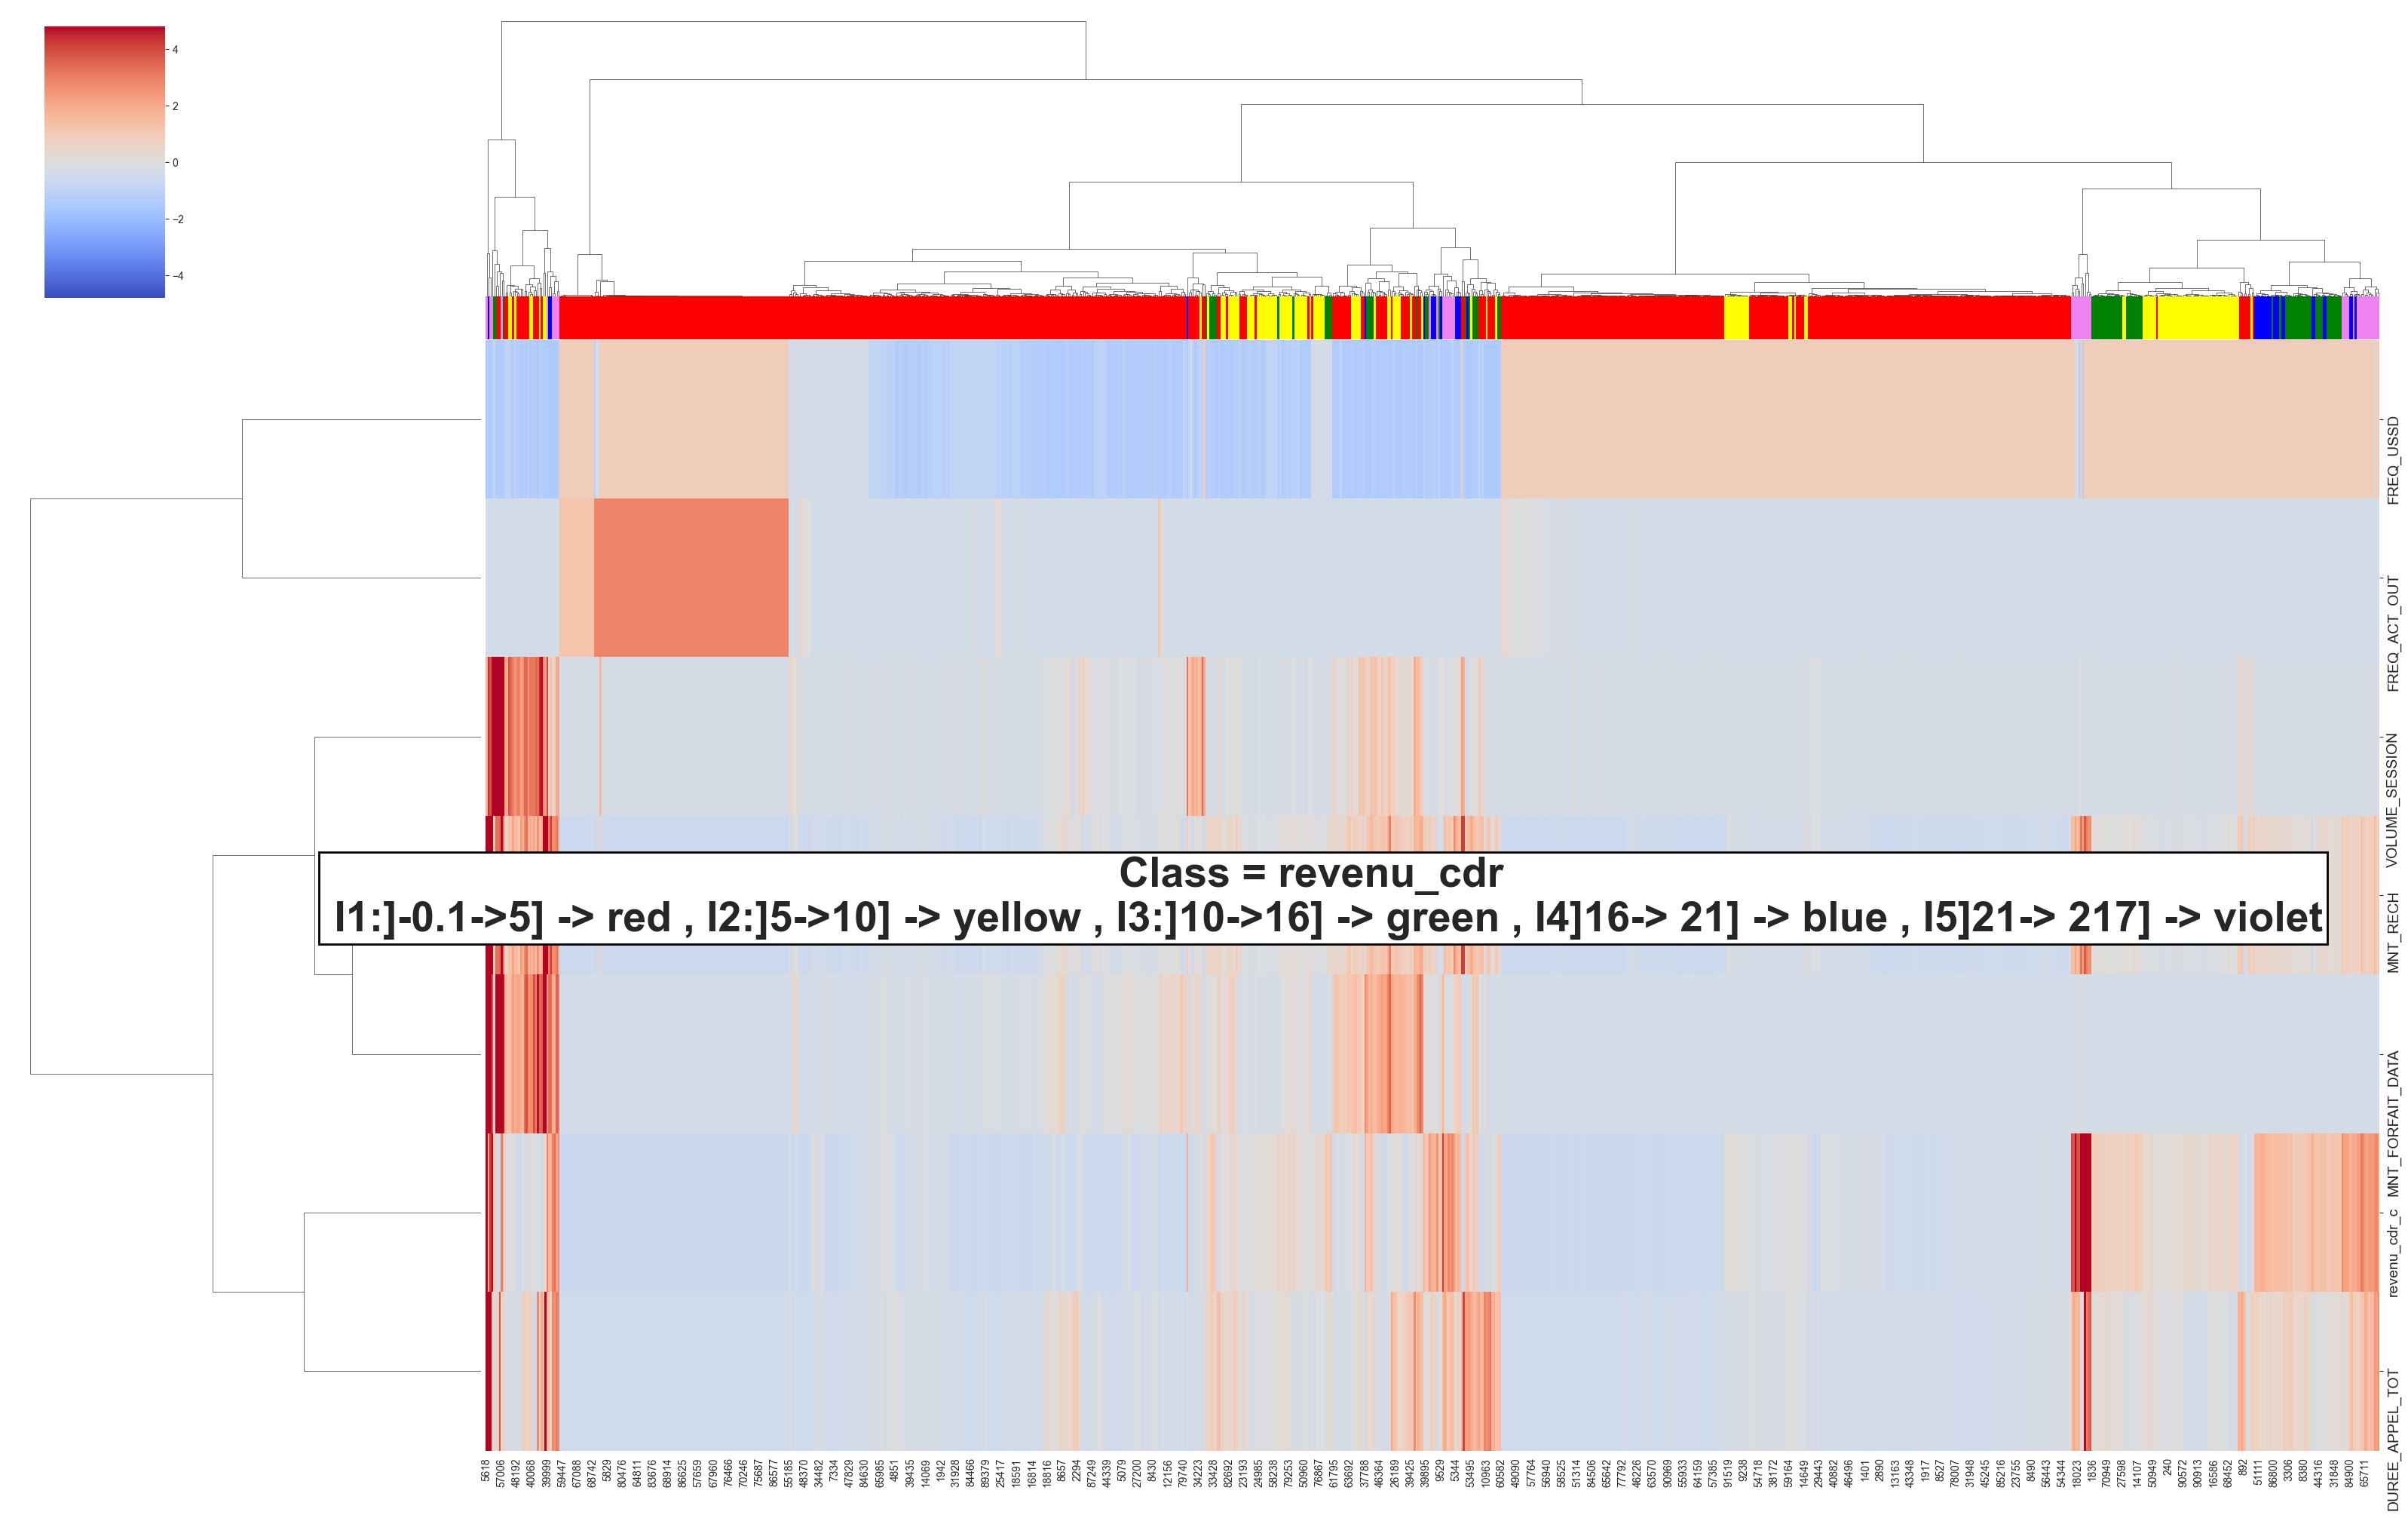

In [22]:


metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(dataTelecomSelectedSample_scaled.T, figsize=(32, 20), metric=metric, method=method, cmap=cmap,
                             row_cluster=True, col_cluster=True, col_colors=y_color,
                             center=0.0, vmin=-4.8, vmax=4.8)

# Increase the font size of the column labels on the right
clustergrid.ax_heatmap.yaxis.tick_right()
clustergrid.ax_heatmap.yaxis.set_tick_params(labelsize=14)  # Adjust the font size as desired

#-1,4,9,183.9999,185
# Set the title
# intervals=[-0.1,5,10,16,21,217] # ---> ] .. , ..]
title = "Class = revenu_cdr  \n I1:]-0.1->5] -> red , I2:]5->10] -> yellow , I3:]10->16] -> green , I4]16-> 21] -> blue , I5]21-> 217] -> violet"
title_obj = clustergrid.fig.suptitle(title, fontsize=40, y=0.43,x=0.55, fontweight='bold')

# Add a border to the title
title_obj.set_bbox({"facecolor": "white", "edgecolor": "black", "linewidth": 2})
clustergrid.savefig('CAH.png')


#clustergrid.fig.suptitle(title, fontsize=40, y=0.45,x=0.65,color="#17B79C",fontstyle="oblique")


# Interval 1 -> red , Interval 2 -> orange , Interval 3 -> yellow , Interval 4 -> green , Interval 5 -> blue

In [23]:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Average Silhouette Score:", silhouette_avg)

Average Silhouette Score: 0.5097080789066769


In [24]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------- Evalution --------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [25]:
from sklearn.metrics import calinski_harabasz_score

kmeans_labels = KmeansData['Cluster']
cah_cluster_labels = fcluster(Z, 6, criterion='distance')



calinski_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
calinski_cah = calinski_harabasz_score(X_scaled, cah_cluster_labels)


print("Calinski-Harabasz Index - K-Means:", calinski_kmeans)
print("Calinski-Harabasz Index - CAH:", calinski_cah)


Calinski-Harabasz Index - K-Means: 530.3285843799048
Calinski-Harabasz Index - CAH: 1129.1936021152126
